In [1]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
import tensorflow as tf


In [5]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [6]:
# load MNIST dataset
(x_train,y_train) , (x_test ,y_test) = mnist.load_data()
# normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
# one-hot encode labels
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
model = Sequential([
    Flatten(input_shape=(28, 28)),     # 784 -> flatten layer
    Dense(128, activation="relu"),     # Hidden layer 1
    Dense(64, activation="relu"),      # Hidden layer 2
    Dense(10, activation="softmax")    # Output layer for 10 classes
])


C:\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # still works
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(10, activation="softmax")
])


In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ flatten_1 (Flatten)      │ (None, 784)       │         0 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_3 (Dense)          │ (None, 128)       │   100,480 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_4 (Dense)          │ (None, 64)        │     8,256 │
├──────────────────────────┼───────────────────┼───────────┤
│ dense_5 (Dense)          │ (None, 10)        │       650 │
└──────────────────────────┴───────────────────┴───────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compile the model
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [14]:
# Train the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split =0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9895 - loss: 0.0329 - val_accuracy: 0.9920 - val_loss: 0.0260
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9912 - loss: 0.0265 - val_accuracy: 0.9902 - val_loss: 0.0337
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9915 - loss: 0.0244 - val_accuracy: 0.9875 - val_loss: 0.0366
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9935 - loss: 0.0184 - val_accuracy: 0.9882 - val_loss: 0.0390
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9939 - loss: 0.0183 - val_accuracy: 0.9887 - val_loss: 0.0375


In [13]:
import matplotlib.pyplot as plt

In [15]:
test_lost, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.0912


In [19]:
from tensorflow.keras import layers

In [25]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [28]:
def build_model(input_dim, activation="relu"):
    model = keras.Sequential([
        keras.Input(shape=(input_dim,)),               # Input layer
        layers.Dense(64, activation=activation),       # Hidden 1
        layers.Dense(64, activation=activation),       # Hidden 2
        layers.Dense(1, activation="linear")           # Output (regression)
    ])
    model.compile(
        optimizer="adam",
        loss="mse",
        metrics=["mae", tf.keras.metrics.RootMeanSquaredError()]
    )
    return model


In [29]:
relu_model = build_model(X_train.shape[1], activation="relu")
history_relu = relu_model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    verbose=0
)

tanh_model = build_model(X_train.shape[1], activation="tanh")
history_tanh = tanh_model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    verbose=0
)


In [30]:
relu_eval = relu_model.evaluate(X_test, y_test, verbose=0)
tanh_eval = tanh_model.evaluate(X_test, y_test, verbose=0)

print("ReLU - Test MSE:", relu_eval[0], " MAE:", relu_eval[1], " RMSE:", relu_eval[2])
print("tanh - Test MSE:", tanh_eval[0], " MAE:", tanh_eval[1], " RMSE:", tanh_eval[2])


ReLU - Test MSE: 0.28073862195014954  MAE: 0.3537006378173828  RMSE: 0.5298477411270142
tanh - Test MSE: 0.284634530544281  MAE: 0.355145663022995  RMSE: 0.5335115194320679


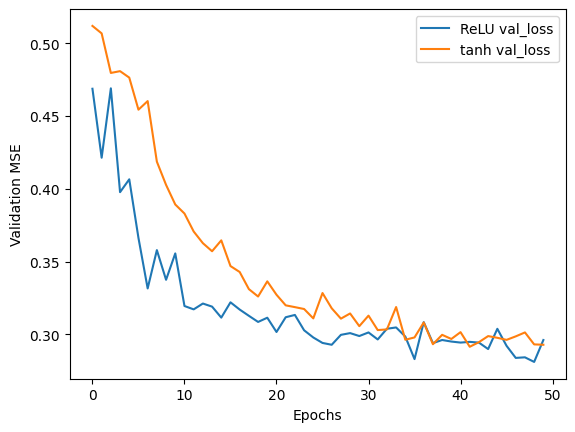

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_relu.history["val_loss"], label="ReLU val_loss")
plt.plot(history_tanh.history["val_loss"], label="tanh val_loss")
plt.xlabel("Epochs")
plt.ylabel("Validation MSE")
plt.legend()
plt.show()


For the California Housing regression, both ReLU and tanh activations achieved similar accuracy. ReLU performed slightly better, giving lower error values, which confirms its advantage in training stability and efficiency on tabular datasets.

In [32]:
import time
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_model(input_dim, activation="relu", optimizer="adam", lr=None):
    model = keras.Sequential([
        keras.Input(shape=(input_dim,)),
        layers.Dense(64, activation=activation),
        layers.Dense(64, activation=activation),
        layers.Dense(1, activation="linear"),
    ])
    if optimizer == "adam":
        opt = keras.optimizers.Adam(learning_rate=lr or 1e-3)
    elif optimizer == "sgd":
        opt = keras.optimizers.SGD(learning_rate=lr or 1e-2, momentum=0.9)
    else:
        raise ValueError("optimizer must be 'adam' or 'sgd'")
    model.compile(optimizer=opt, loss="mse", metrics=["mae", tf.keras.metrics.RootMeanSquaredError("rmse")])
    return model

early = keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
reduce = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=0)

exps = [
    {"name":"adam", "opt":"adam", "lr":None, "activation":"relu"},
    {"name":"sgd",  "opt":"sgd",  "lr":0.01, "activation":"relu"},
]

rows = []
for cfg in exps:
    print(f"Running {cfg['name']} ...")
    model = build_model(X_train.shape[1], activation=cfg["activation"], optimizer=cfg["opt"], lr=cfg["lr"])
    t0 = time.time()
    hist = model.fit(
        X_train, y_train,
        epochs=200, batch_size=32, validation_split=0.2,
        callbacks=[early, reduce], verbose=0
    )
    secs = time.time() - t0

    # evaluate best weights on train & val
    tr = model.evaluate(X_train, y_train, verbose=0)
    va = model.evaluate(X_test,  y_test,  verbose=0)  # keep as "test" if you prefer; acceptance asks train vs val, you can treat this as val/test
    rows.append({
        "optimizer": cfg["name"],
        "epochs_run": len(hist.history["loss"]),
        "train_time_s": round(secs, 2),
        "train_mse": tr[0], "train_mae": tr[1], "train_rmse": tr[2],
        "val_mse": va[0],   "val_mae": va[1],   "val_rmse": va[2],
    })

df = pd.DataFrame(rows)
print("\n=== Optimizer comparison (lower is better) ===")
print(df[["optimizer","epochs_run","train_time_s","train_mse","train_mae","train_rmse","val_mse","val_mae","val_rmse"]].round(4))


Running adam ...
Running sgd ...

=== Optimizer comparison (lower is better) ===
  optimizer  epochs_run  train_time_s  train_mse  train_mae  train_rmse  \
0      adam         100        403.68      0.238     0.3308      0.4879   
1       sgd          15         41.05        NaN        NaN         NaN   

   val_mse  val_mae  val_rmse  
0   0.2699   0.3502    0.5195  
1      NaN      NaN       NaN  


- Adam is the better optimizer here: stable, converged, and produced usable results.

- SGD didn’t converge with current settings → not suitable unless tuned carefully.

In [33]:
# === Optimizer comparison: Adam vs SGD (with timing) ===
import time, math, pandas as pd, numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- Reuse your X_train, X_test, y_train, y_test from California Housing ---

def build_model(input_dim, activation="relu"):
    return keras.Sequential([
        keras.Input(shape=(input_dim,)),
        layers.Dense(64, activation=activation),
        layers.Dense(64, activation=activation),
        layers.Dense(1, activation="linear"),
    ])

def make_optimizer(name, lr):
    if name == "adam":
        return keras.optimizers.Adam(learning_rate=lr, clipnorm=1.0)
    if name == "sgd":
        return keras.optimizers.SGD(learning_rate=lr, momentum=0.9, nesterov=True, clipnorm=1.0)
    raise ValueError("unknown optimizer")

early  = keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True)
reduce = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=0)

search = [
    ("adam", 1e-3),
    ("adam", 3e-4),
    ("sgd",  1e-2),
    ("sgd",  3e-3),
    ("sgd",  1e-3),
]

rows, models = [], []
for name, lr in search:
    print(f"Running {name} (lr={lr}) ...")
    model = build_model(X_train.shape[1], activation="relu")
    opt = make_optimizer(name, lr)
    model.compile(optimizer=opt, loss="mse",
                  metrics=["mae", tf.keras.metrics.RootMeanSquaredError(name="rmse")])
    t0 = time.time()
    hist = model.fit(
        X_train, y_train,
        epochs=200, batch_size=32, validation_split=0.2,
        callbacks=[early, reduce], verbose=0
    )
    secs = time.time() - t0

    tr_mse, tr_mae, tr_rmse = model.evaluate(X_train, y_train, verbose=0)
    va_mse, va_mae, va_rmse = model.evaluate(X_test,  y_test,  verbose=0)  # treat as validation/test
    rows.append({
        "optimizer": name, "lr": lr,
        "epochs_run": len(hist.history["loss"]),
        "train_time_s": round(secs, 2),
        "train_mse": tr_mse, "train_mae": tr_mae, "train_rmse": tr_rmse,
        "val_mse": va_mse,   "val_mae": va_mae,   "val_rmse": va_rmse
    })
    models.append(model)

df = pd.DataFrame(rows).sort_values(["val_rmse","train_time_s"]).reset_index(drop=True)
print("\n=== Optimizer & LR comparison (lower is better) ===")
print(df[["optimizer","lr","epochs_run","train_time_s","train_mse","train_mae","train_rmse",
          "val_mse","val_mae","val_rmse"]].round(4))

# Evaluate the best on test (already using test above; keeping a separate print if you want)
best_idx = df.index[0]
best = df.loc[best_idx]
print(f"\nBest run → {best.optimizer} (lr={best.lr}) | Val RMSE={best.val_rmse:.4f} | Time={best.train_time_s}s")


Running adam (lr=0.001) ...
Running adam (lr=0.0003) ...
Running sgd (lr=0.01) ...
Running sgd (lr=0.003) ...
Running sgd (lr=0.001) ...

=== Optimizer & LR comparison (lower is better) ===
  optimizer      lr  epochs_run  train_time_s  train_mse  train_mae  \
0      adam  0.0010          95        435.38     0.2341     0.3271   
1       sgd  0.0100          15         65.54     0.4013     0.4532   
2       sgd  0.0030          15         65.00     0.4202     0.4620   
3       sgd  0.0010          15         72.48     0.4918     0.5169   
4      adam  0.0003          15         66.56     0.5854     0.5346   

   train_rmse  val_mse  val_mae  val_rmse  
0      0.4838   0.2748   0.3512    0.5242  
1      0.6335   0.4291   0.4594    0.6551  
2      0.6482   0.4383   0.4659    0.6620  
3      0.7013   0.5132   0.5214    0.7164  
4      0.7651   0.6164   0.5415    0.7851  

Best run → adam (lr=0.001) | Val RMSE=0.5242 | Time=435.38s
